# Example 5.3 (Constructing a confidence ellipse for $\mu$)

In [1]:
import pathlib
import numpy as np
import pandas as pd
from chapter_5_utils import plot_confidence_ellipse

In [2]:
def load_data() -> pd.DataFrame:
    """
    Load the microwave radiation data from Example 5.3 and Example 5.4.
    """
    closed_pth = pathlib.Path('..\..\data\Table4.1.xlsx')
    closed_df = pd.read_excel(closed_pth, names=['Oven', 'ClosedRadiation'])

    open_pth = pathlib.Path('..\..\data\Table4.5.xlsx')
    open_df = pd.read_excel(open_pth, names=['Oven', 'OpenRadiation'])

    return closed_df.merge(open_df).set_index('Oven')**(1/4)



In [3]:
radiation_df = load_data()
radiation_df.head(3)

,ClosedRadiation,OpenRadiation
Oven,,
1,0.622333,0.740083
2,0.547723,0.547723
3,0.651356,0.740083


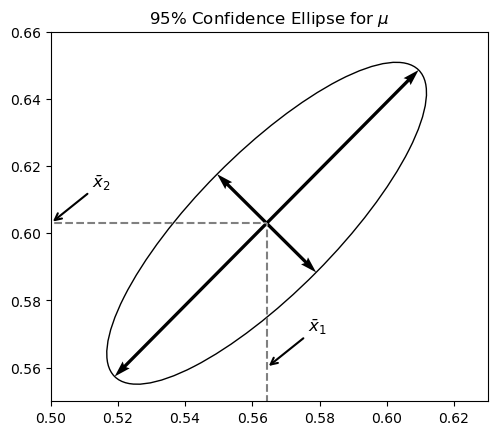

In [4]:
xbar = np.mean(radiation_df, axis=0)
n, p = radiation_df.shape
my_plot, ax = plot_confidence_ellipse(
    radiation_df, n, p, alpha=0.05)
ax.set_title('95% Confidence Ellipse for $\mu$')
my_plot.xlim([0.50, 0.63])
my_plot.ylim([0.55, 0.66])
ax.set_aspect('equal')

# Draw dashed lines at the mean.
ax.plot([xbar[0], xbar[0]], [0, xbar[1]], linestyle='--', color='gray')
ax.plot([0, xbar[0]], [xbar[1], xbar[1]], linestyle='--', color='gray')

# Label mean with arrows.
ax.annotate(r'$\bar{x}_{1}$', (xbar[0], 0.56), xytext=(30, 26),
                textcoords='offset points', fontsize=12, 
                arrowprops=dict(arrowstyle="->", lw=1.5))
ax.annotate(r'$\bar{x}_{2}$', (0.50, xbar[1]), xytext=(30, 26),
                textcoords='offset points', fontsize=12, 
                arrowprops=dict(arrowstyle="->", lw=1.5))

my_plot.show()